In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.optimize import curve_fit

In [3]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',', '.'))

In [4]:
lamb_og, inten_og=np.loadtxt('data/himmel_o_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
lamb_mg, inten_mg=np.loadtxt('data/himmel_m_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

OSError: data/himmel_o_g.txt not found.

In [ ]:
plt.plot(lamb_og, inten_og, label='ohne Fenster')
plt.plot(lamb_mg, inten_mg, label='mit Fenster')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.legend()
plt.grid()
plt.ylim((0, 60000))
plt.xlim((250, 900))
plt.savefig("figures/Himmel_m_o_G.pdf", format="pdf")

# Absorption

In [ ]:
A = 1-inten_mg/inten_og

plt.plot(lamb_mg, A)
plt.title('Absorption von Glas')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Absorption / b.E.')
plt.ylim((0,1))
plt.xlim((320, 800))
plt.savefig("figures/Absorption_Glas.pdf", format="pdf")

# Fraunhoferlinien

In [ ]:
%matplotlib notebook
plt.plot(lamb_og, inten_og)
plt.title('Sonnenspektrum')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0, 65000))
plt.xlim((350,800))
plt.savefig("figures/Fraunhofer.pdf", format="pdf")
plt.show()

# Auswertung Natriumspektrum

In [ ]:
%matplotlib notebook
lamb_og, inten_og=np.loadtxt('data/Na1.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_og, inten_og)
plt.title('Natriumspektrum geringer Intensität')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((0, 600000))
plt.xlim((300, 540))
plt.savefig('figures/Na_Spektrum_niedrige_Int.pdf', format='pdf')
plt.show()

In [ ]:
%matplotlib notebook
lamb_og, inten_og=np.loadtxt('data/Na2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_og, inten_og)
plt.title('Natriumspektrum hoher Intensität')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((0, 80000))
plt.xlim((300, 850))
plt.savefig('figures/Na_Spektrum_hohe_Int.pdf', format='pdf')
plt.show()

# Zuordnung zu Serien

## 1. Nebenserie

In [ ]:
E_3p = -3.0254

for m in range(3, 13):
    l = 1.2398e3/((-13.605/m**2)-E_3p)
    #print('m={m:2d}, lambda={1:6.2f}'.format(m=m,l=l))
    print(m, l)

## 2. Nebenserie

In [ ]:
delta_s = 1.3715
E_3s = -5.1303

for m in range(4, 10):
    l = 1.2398e3/((-13.605/(m-delta_s)**2)-E_3p)
    #print('m={m:2d}, lambda={1:6.2f}'.format(m=m,l=l))
    print(m, l)

## Hauptserie

In [ ]:
delta_p = 0.8794

for m in range(4, 6):
    l = 1.2398e3/((-13.605/(m-delta_p)**2)-E_3s)
    #print('m={m:2d}, lambda={1:6.2f}'.format(m=m,l=l))
    print(m, l)

# Bestimmung der Serienenergien und der l-abhängigen Korrekturfaktoren

## 1. Nebenserie

In [1]:
from scipy.stats import chi2
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np 
wellenl=np.array([819.5, 570, 498, 466.3, 450.6, 439.1, 433.3, 429.9, 426.3]) #Werte eintragen
fehler=np.array([2, 1, 1, 1, 2, 1.5, 1.5, 1, 1]) # Werte eintragen
quantenz=np.arange(3,12)

plt.errorbar(quantenz, wellenl, fehler, fmt="om")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('1. Nebenserie des Na-Atoms')
plt.savefig("C:/Users/lorena/Desktop/BLA.pdf", format="pdf")
#plt.show()

In [28]:
def fit_func(m, E_Ry, E_3p, D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

In [30]:
para = [-13.6, -3, -0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler, p0=para)
print("E_Ry = ", popt[0], ", Standardfehler = ", np.sqrt(pcov[0][0]))
print("E_3p = ", popt[1], ", Standardfehler = ", np.sqrt(pcov[1][1]))
print("D_d = ", popt[2], ", Standardfehler = ", np.sqrt(pcov[2][2]))

E_Ry =  -13.18992477035193 , Standardfehler =  0.3717658503654678
E_3p =  -3.023427722137284 , Standardfehler =  0.006074904982252728
D_d =  0.04601540294940737 , Standardfehler =  0.03775495073951108


In [31]:
chi2_ = np.sum((fit_func(quantenz, *popt)-wellenl)**2/fehler**2)
dof = len(quantenz)-3 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

chi2 =  6.13296628064977
chi2_red =  1.0221610467749616


In [32]:
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob, "%")

Wahrscheinlichkeit: 41.0 %


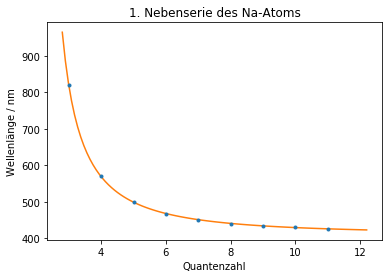

In [34]:
plt.errorbar(quantenz,wellenl,fehler,fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8, 12.2, 100)
plt.plot(x, fit_func(x, *popt))

## 2. Nebenserie

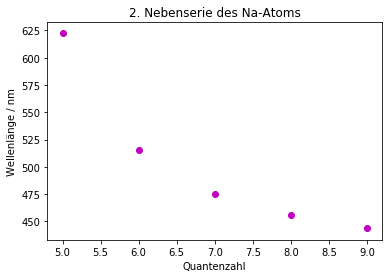

In [37]:
wellenl=np.array([ 622.4, 515.3, 475, 455.4, 444.1]) #Werte eintragen
fehler=np.array([ 1, 1, 1, 1, 2]) # Werte eintragen
quantenz=np.arange(5,10)

plt.errorbar(quantenz, wellenl, fehler, fmt="om")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('2. Nebenserie des Na-Atoms')
plt.show()

In [38]:
def fit_func(m, E_Ry, E_3s, D_s):
    return 1.2398E3/(E_Ry/(m-D_s)**2-E_3s)

In [39]:
para = [-13.6, -3, -0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler, p0=para)
print("E_Ry = ", popt[0], ", Standardfehler = ", np.sqrt(pcov[0][0]))
print("E_3s = ", popt[1], ", Standardfehler = ", np.sqrt(pcov[1][1]))
print("D_s = ", popt[2], ", Standardfehler = ", np.sqrt(pcov[2][2]))

E_Ry =  -10.841401323499618 , Standardfehler =  0.20145405194780747
E_3s =  -2.9973076073019107 , Standardfehler =  0.003515729786242947
D_s =  1.7162020820300254 , Standardfehler =  0.025164003572046324


In [40]:
chi2_ = np.sum((fit_func(quantenz, *popt)-wellenl)**2/fehler**2)
dof = len(quantenz)-3 #dof: degrees of freedom
chi2_red = chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)

chi2 =  0.0679890357896266
chi2_red =  0.0339945178948133


In [41]:
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob, "%")

Wahrscheinlichkeit: 97.0 %


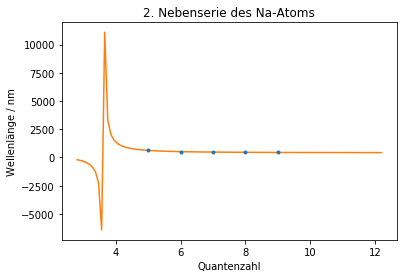

In [43]:
plt.errorbar(quantenz,wellenl,fehler,fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('2. Nebenserie des Na-Atoms')
x=np.linspace(2.8, 12.2, 100)
plt.plot(x, fit_func(x, *popt))
plt.show()